In [ ]:
#vgg
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the VGG model
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 7s 0us/step


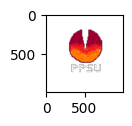

35363/35363 [==============================] - 0s 0us/step
1. jack-o'-lantern: 0.7027
2. candle: 0.0457
3. torch: 0.0279


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img_path = 'ppsu.png'

img = mpimg.imread(img_path)
fig = plt.figure(figsize=(1, 1))
imgplot = plt.imshow(img ,)
plt.show()
# Load and preprocess the image
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
preds = model.predict(x)

# Decode predictions
decoded_preds = decode_predictions(preds, top=3)

# Print predictions
for i, (imagenet_id, label, prob) in enumerate(decoded_preds[0]):
    print(f"{i+1}. {label}: {prob:.4f}")

In [ ]:
#FCN
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

def filter_dogs(datapoint):
    return tf.equal(datapoint['label'], 1)  # Assuming 1 represents dogs in the dataset

dog_dataset = dataset['train'].filter(filter_dogs)

def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask


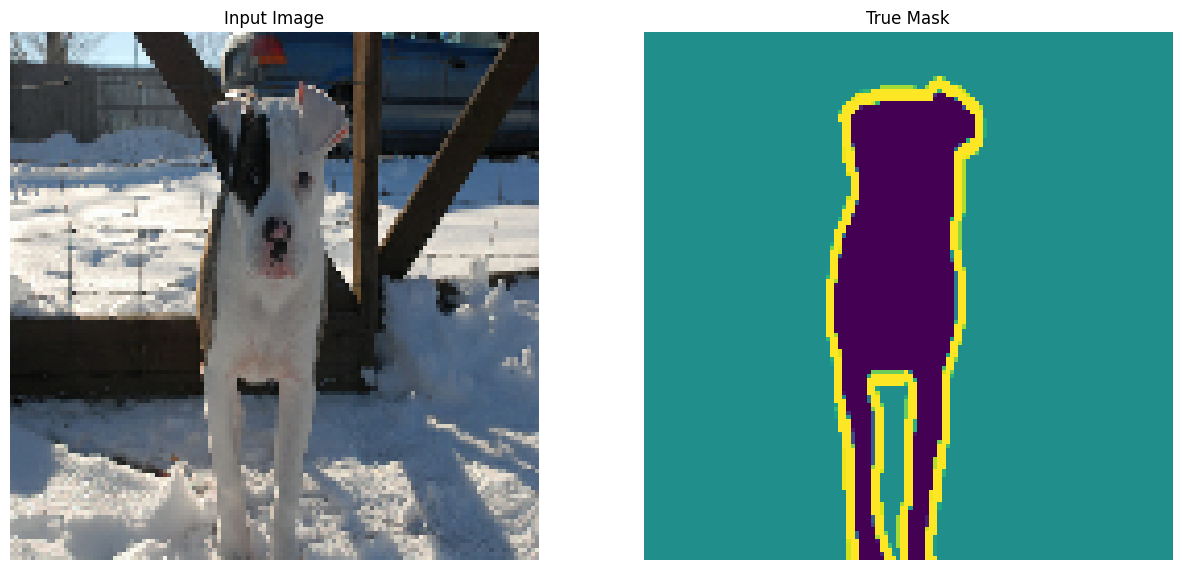

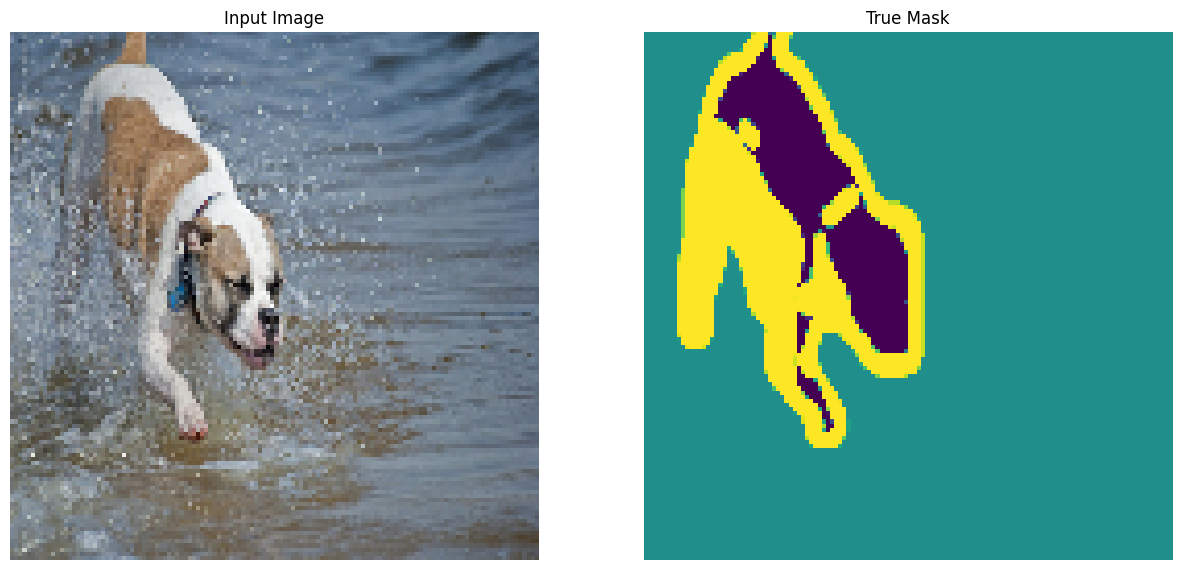

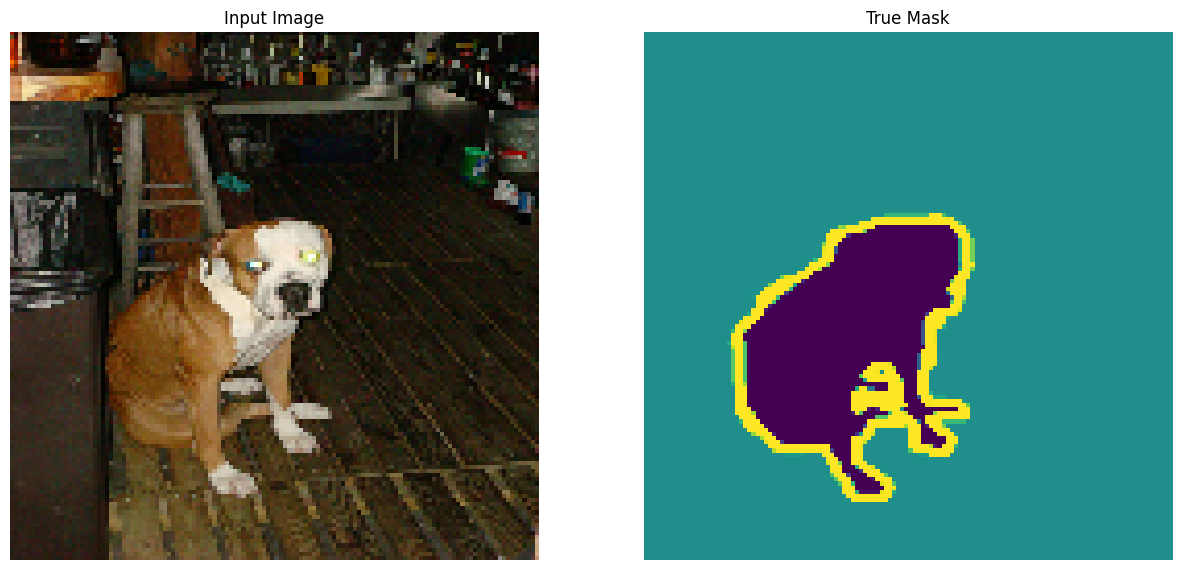

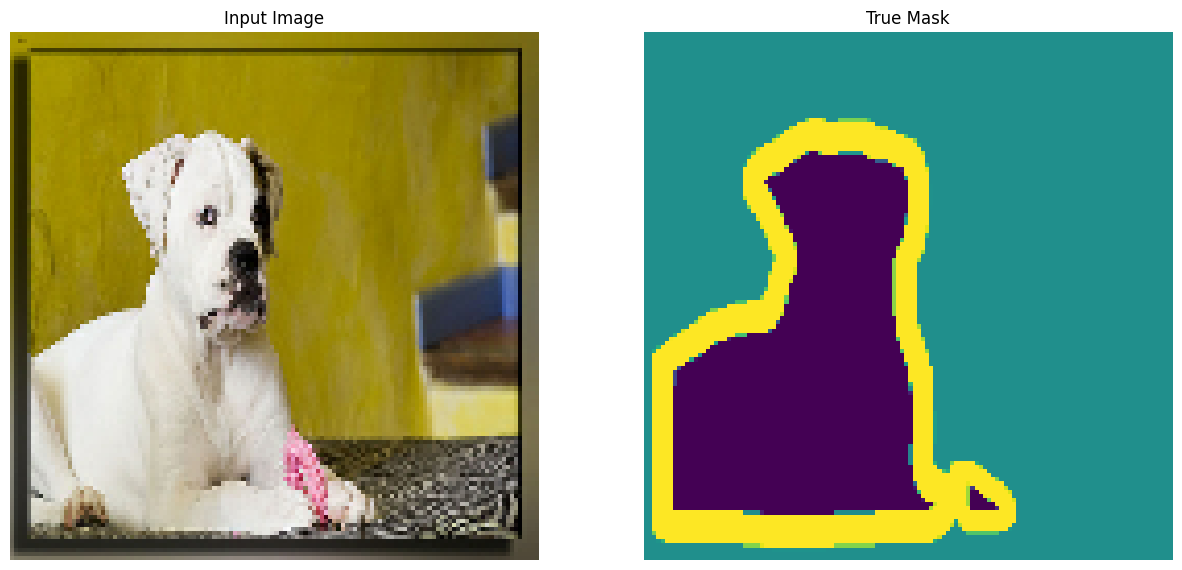

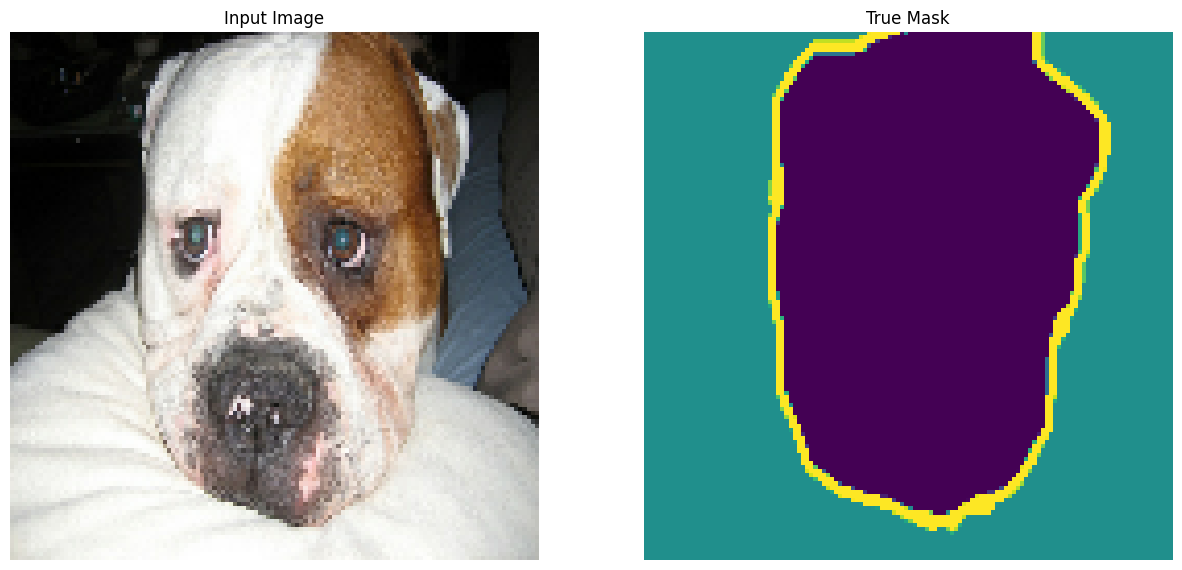

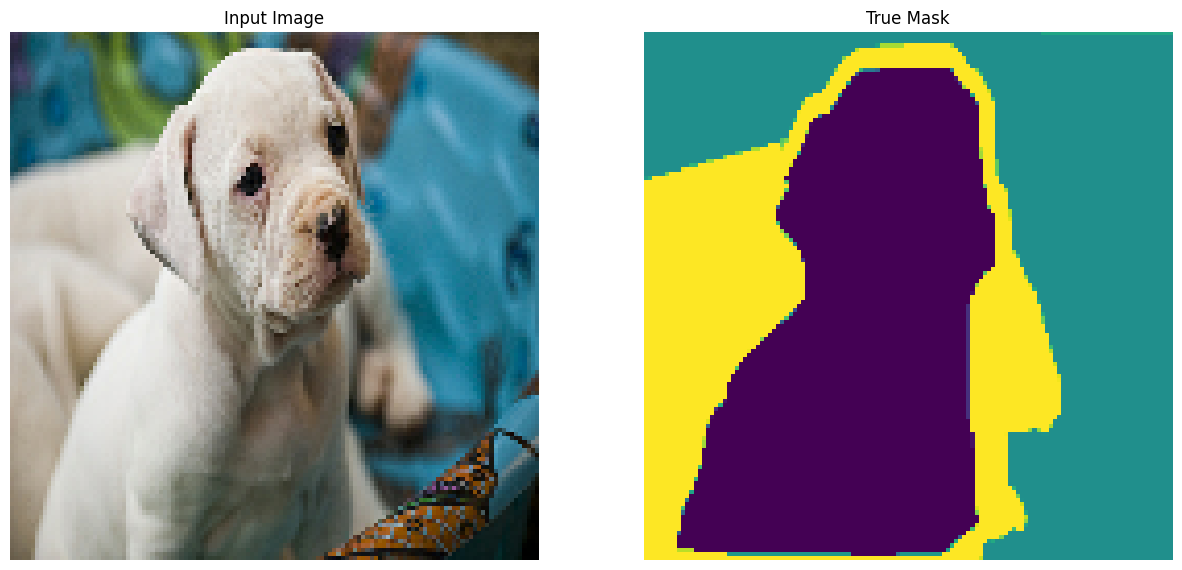

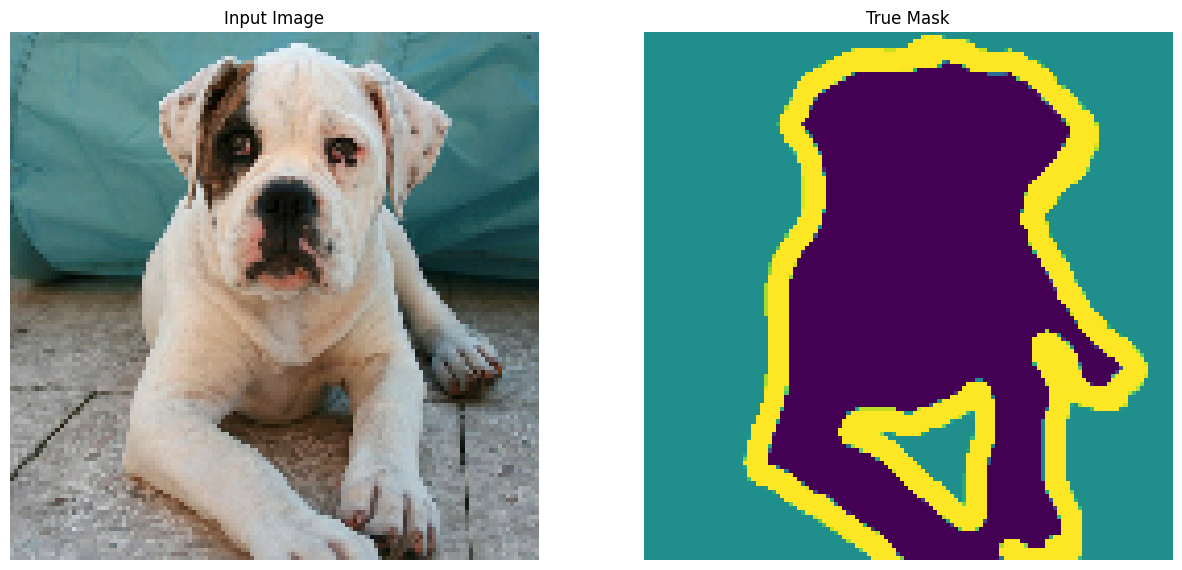

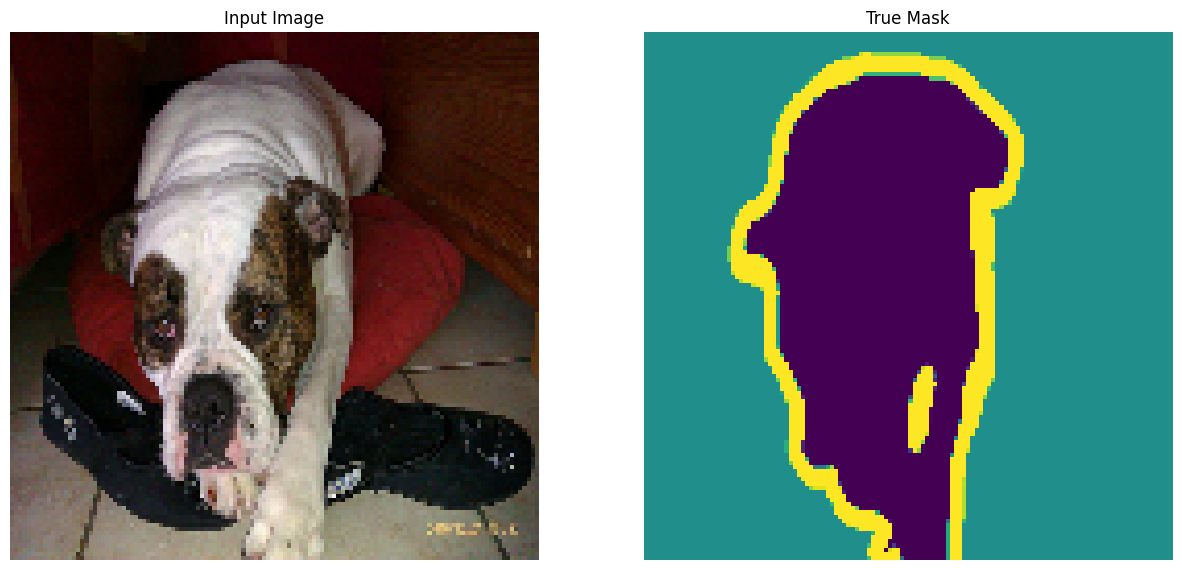

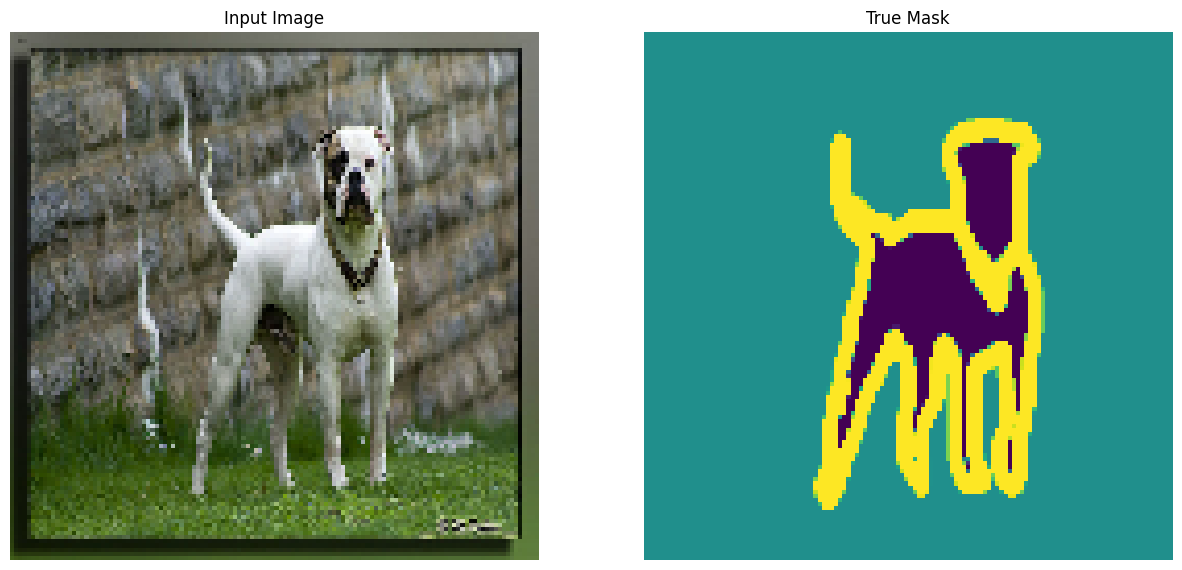

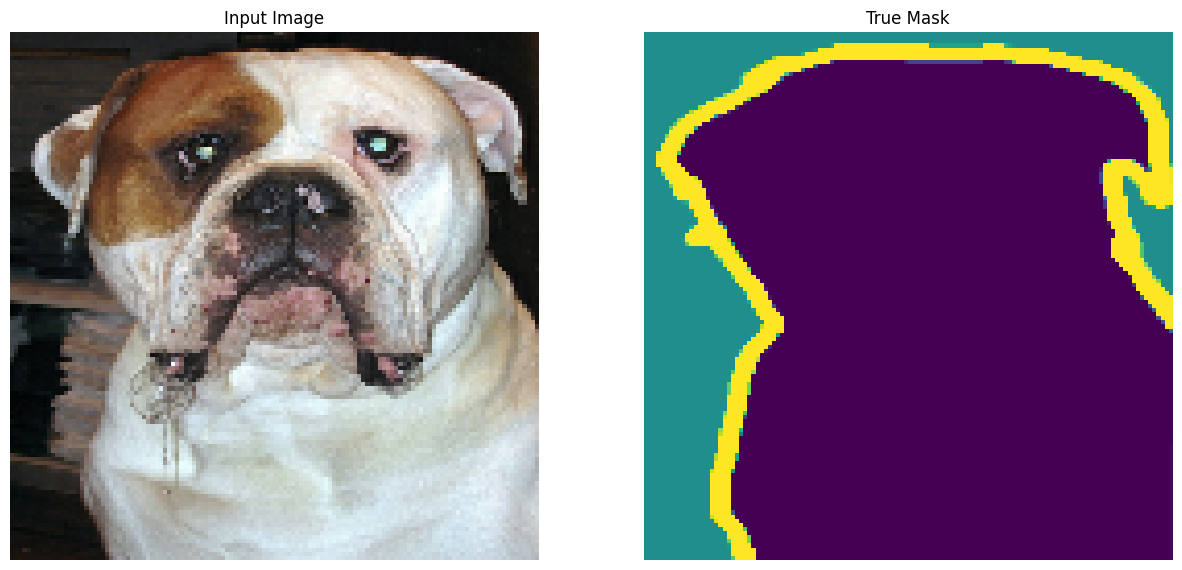

In [ ]:
TRAIN_LENGTH = info.splits['train'].num_examples
BUFFER_SIZE = 1000
BATCH_SIZE = 128
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dog_dataset.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Display dog images and their masks
for image, mask in train.take(10):
    sample_image, sample_mask = image, mask
    display([sample_image, sample_mask])
